### Final Project Sanbercode Python-Data Science Batch 54
by: Muhammad Iqbal Yusuf

**Objective:**

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.


**Tentang Organisasi:**

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.



**Permasalahan:**

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Load Data

In [2]:
df=pd.read_csv("drive/MyDrive/Colab Notebooks/Project/Data_Negara_HELP.csv")
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### Assessing Data

In [3]:
# Checking Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# Checking Missing Value
df.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [5]:
# Checking Duplicated Data
df.duplicated().sum()

0

In [6]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


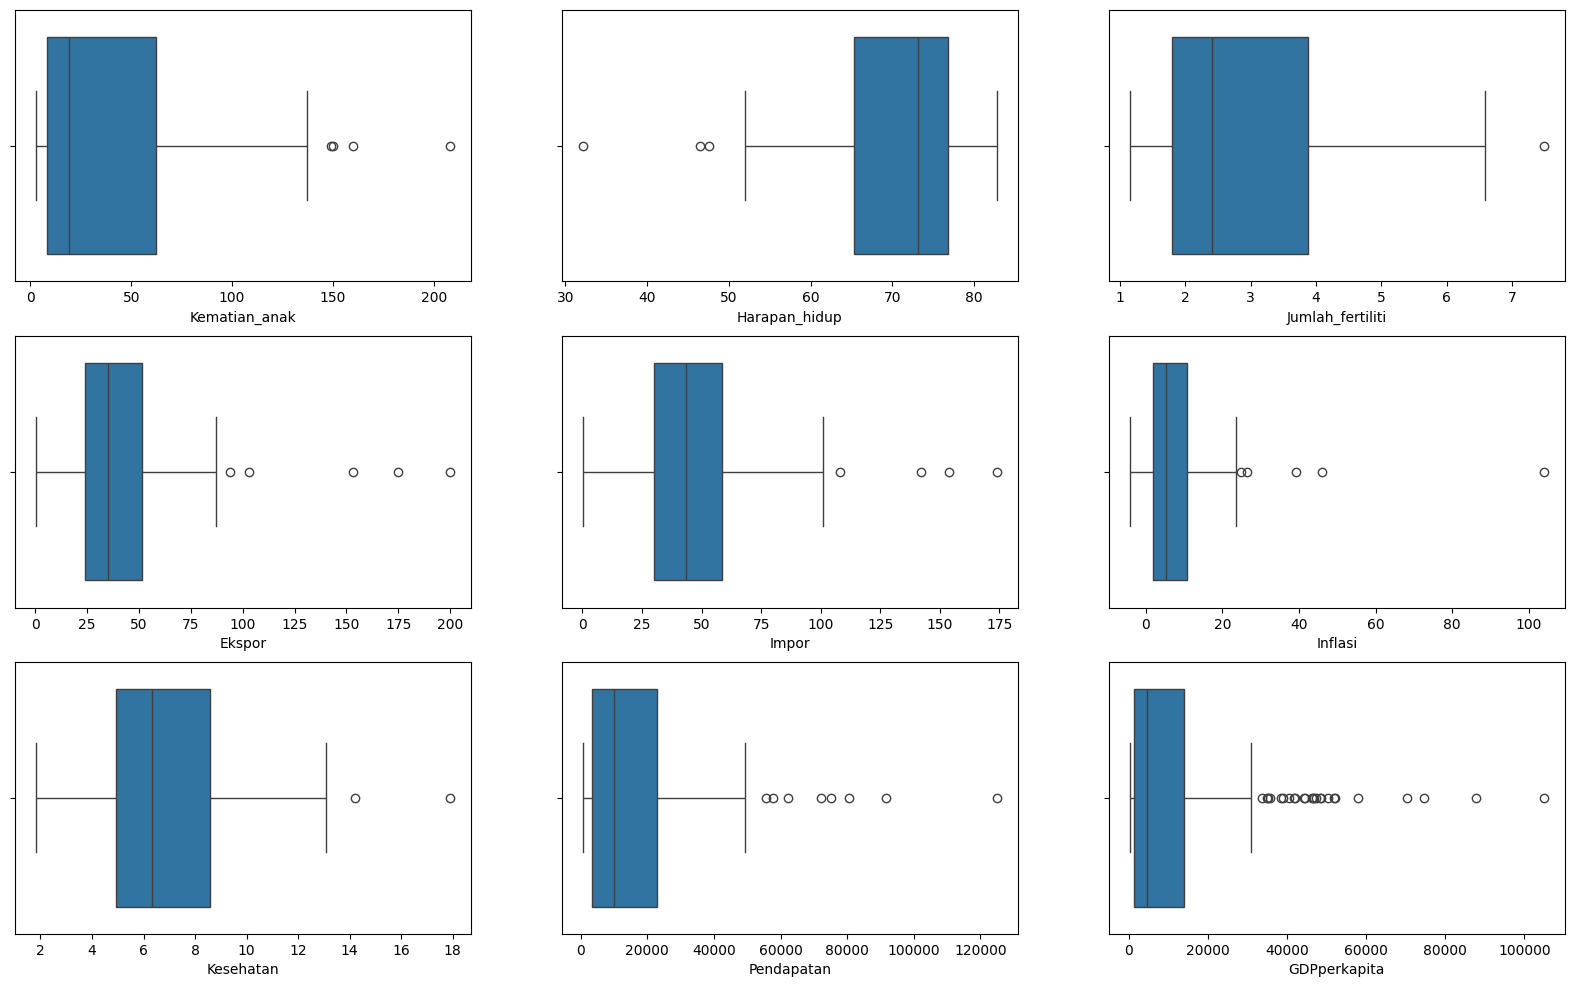

In [7]:
# Checking Outlier
fig, axes = plt.subplots(3, 3, figsize=(20,12))

sns.boxplot(ax=axes[0,0], data=df, x='Kematian_anak')
sns.boxplot(ax=axes[0,1], data=df, x='Harapan_hidup')
sns.boxplot(ax=axes[0,2], data=df, x='Jumlah_fertiliti')
sns.boxplot(ax=axes[1,0], data=df, x='Ekspor')
sns.boxplot(ax=axes[1,1], data=df, x='Impor')
sns.boxplot(ax=axes[1,2], data=df, x='Inflasi')
sns.boxplot(ax=axes[2,0], data=df, x='Kesehatan')
sns.boxplot(ax=axes[2,1], data=df, x='Pendapatan')
sns.boxplot(ax=axes[2,2], data=df, x='GDPperkapita')

plt.show()

### Cleaning Data

In [8]:
def outliers(df, fitur):
  Q1 = df[fitur].quantile(0.25)
  Q3 = df[fitur].quantile(0.75)
  IQR = Q3 - Q1
  min_bound = Q1 - 1.5 * IQR
  max_bound = Q3 + 1.5 * IQR

  ls = df.index[(df[fitur] < min_bound) | (df[fitur] > max_bound)]

  return ls

In [9]:
index_list = []
for feature in ['Kematian_anak','Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']:
  index_list.extend(outliers(df, feature))

In [10]:
def remove_outliers(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [11]:
df_clean = remove_outliers(df, index_list)
df_clean.shape

(128, 10)

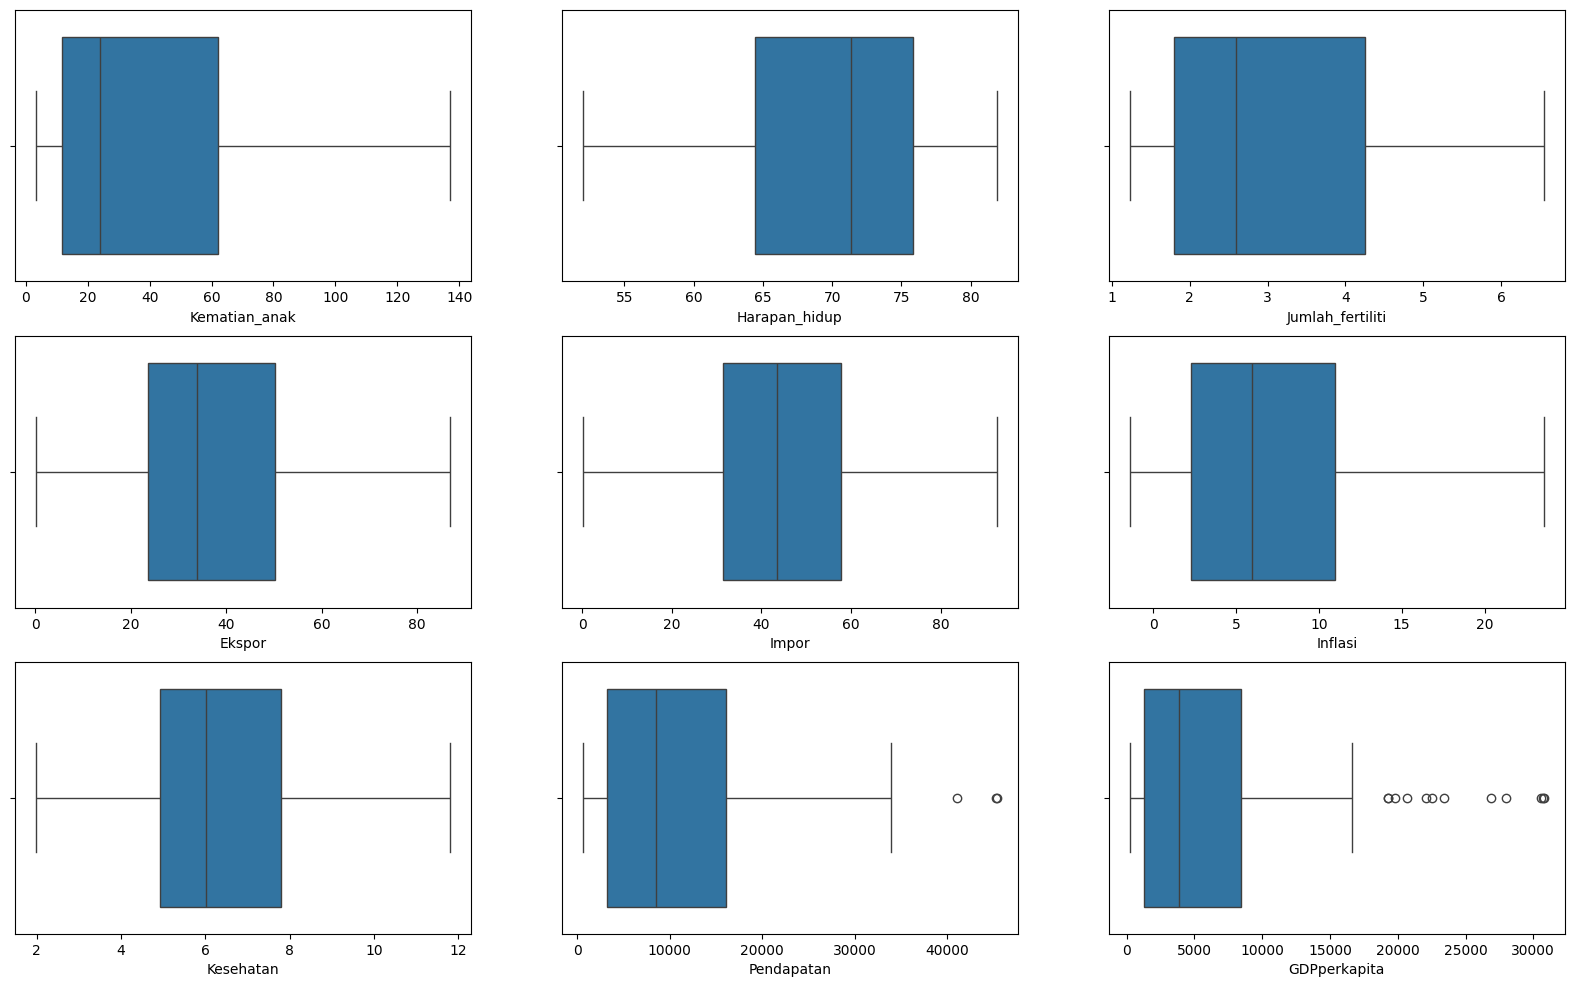

In [12]:
# Checking Outlier
fig, axes = plt.subplots(3, 3, figsize=(20,12))

sns.boxplot(ax=axes[0,0], data=df_clean, x='Kematian_anak')
sns.boxplot(ax=axes[0,1], data=df_clean, x='Harapan_hidup')
sns.boxplot(ax=axes[0,2], data=df_clean, x='Jumlah_fertiliti')
sns.boxplot(ax=axes[1,0], data=df_clean, x='Ekspor')
sns.boxplot(ax=axes[1,1], data=df_clean, x='Impor')
sns.boxplot(ax=axes[1,2], data=df_clean, x='Inflasi')
sns.boxplot(ax=axes[2,0], data=df_clean, x='Kesehatan')
sns.boxplot(ax=axes[2,1], data=df_clean, x='Pendapatan')
sns.boxplot(ax=axes[2,2], data=df_clean, x='GDPperkapita')

plt.show()

Notes :

Setelah diakukan proses menghapus data outlier, jika dilihat dari grafik boxplot di atas, pada kolom fitur Pendapatan dan GDPperkapita masih tampak data outlier. Somehow, garis whisker yang tampak kurang sesuai dengan Batas atas pada masing-masing kedua kolom fitur tersebut. Namun, pada saat dilakukan pengecekan data secara manual, semua data pada df_clean telah tercover dengan baik seuai dengan perhitungan IQRnya masing-masing.

### EDA

In [13]:
df_clean

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [14]:
df_clean.to_excel("drive/MyDrive/Colab Notebooks/Project/Data_Clean.xlsx")

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            128 non-null    object 
 1   Kematian_anak     128 non-null    float64
 2   Ekspor            128 non-null    float64
 3   Kesehatan         128 non-null    float64
 4   Impor             128 non-null    float64
 5   Pendapatan        128 non-null    int64  
 6   Inflasi           128 non-null    float64
 7   Harapan_hidup     128 non-null    float64
 8   Jumlah_fertiliti  128 non-null    float64
 9   GDPperkapita      128 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 11.0+ KB


In [16]:
df_clean.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,38.799219,37.427336,6.345000,45.127077,11149.851562,7.339727,69.694531,3.020781,6426.187500
std,33.964248,18.794958,2.213079,17.771282,9774.820899,6.145248,7.408596,1.465922,7142.127941
min,3.200000,0.109000,1.970000,0.065900,609.000000,-1.430000,52.000000,1.230000,231.000000
25%,11.700000,23.550000,4.912500,31.375000,3225.000000,2.255000,64.450000,1.795000,1305.000000
50%,24.100000,34.000000,6.005000,43.500000,8510.000000,5.935000,71.350000,2.600000,3885.000000
75%,62.200000,50.275000,7.790000,57.650000,16050.000000,10.950000,75.850000,4.247500,8412.500000
max,137.000000,86.900000,11.800000,92.600000,45400.000000,23.600000,81.900000,6.550000,30800.000000


In [17]:
# Bottom 10 Based on Pendapatan
df_bot10p = df_clean.sort_values(by='Pendapatan', ascending=True).head(10)
df_bot10p

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488
126,Rwanda,63.6,12.00,10.50,30.0,1350,2.61,64.6,4.51,563
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.97,55.6,5.05,547
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413


In [18]:
# Top 10 based on Pendapatan
df_top10p = df_clean.sort_values(by='Pendapatan', ascending=False).head(10)
df_top10p

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
128,Saudi Arabia,15.7,49.6,4.29,33.0,45400,17.200,75.1,2.96,19300
115,Oman,11.7,65.7,2.77,41.2,45300,15.600,76.1,2.90,19300
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700
138,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100
89,Libya,16.6,65.6,3.88,42.1,29600,14.200,76.1,2.41,12100
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900


In [19]:
# Bottom 10 based on Kematian_anak
df_bot10_ka = df_clean.sort_values(by='Kematian_anak', ascending=True).head(10)
df_bot10_ka

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900
122,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500
138,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100
51,Estonia,4.5,75.1,6.03,68.7,22700,1.740,76.0,1.72,14600
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500


In [20]:
# Top 10 based on Kematian_anak
df_top10_ka = df_clean.sort_values(by='Kematian_anak', ascending=False).head(10)
df_top10_ka

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
97,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.970,55.6,5.05,547
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220
17,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758
63,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310
106,Mozambique,101.0,31.5,5.21,46.2,918,7.640,54.5,5.56,419


In [21]:
# Bottom 10 based on Harapan_hidup
df_bot10_hh = df_clean.sort_values(by='Harapan_hidup', ascending=True).head(10)
df_bot10_hh

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.39,56.3,5.27,1220
155,Uganda,81.0,17.1,9.01,28.6,1540,10.60,56.8,6.15,595
21,Botswana,52.5,43.6,8.30,51.3,13300,8.92,57.1,2.88,6350
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.91,57.3,5.11,1310


In [22]:
# Top 10 based on Harapan_hidup
df_top10_hh = df_clean.sort_values(by='Harapan_hidup', ascending=False).head(10)
df_top10_hh

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900
39,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200
138,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800
122,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500
86,Lebanon,10.3,35.8,7.03,60.2,16300,0.238,79.8,1.61,8860
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400
33,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900


In [23]:
df_sample1 = df_clean.sample(10)
df_sample1

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
71,Iran,19.3,24.4,5.60,19.4,17400,15.90,74.5,1.76,6530
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
84,Lao,78.9,35.4,4.47,49.3,3980,9.20,63.8,3.15,1140
90,Lithuania,6.1,65.3,7.04,67.2,21100,2.38,73.2,1.50,12000
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
83,Kyrgyz Republic,29.6,51.6,6.18,81.7,2790,10.00,68.5,3.10,880
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.43,77.5,1.51,19800
55,Gabon,63.7,57.7,3.50,18.9,15400,16.60,62.9,4.08,8750
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.11,73.9,1.57,6840
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530


In [24]:
df_sample1.groupby('Negara')[['Pendapatan','Kesehatan','GDPperkapita','Kematian_anak']].mean().sort_values(by='Pendapatan', ascending=False)

,Pendapatan,Kesehatan,GDPperkapita,Kematian_anak
Negara,,,,
Czech Republic,28300.0,7.88,19800.0,3.4
Lithuania,21100.0,7.04,12000.0,6.1
Iran,17400.0,5.60,6530.0,19.3
Gabon,15400.0,3.50,8750.0,63.7
Bulgaria,15300.0,6.87,6840.0,10.8
Algeria,12900.0,4.17,4460.0,27.3
Armenia,6700.0,4.40,3220.0,18.1
Angola,5900.0,2.85,3530.0,119.0
Lao,3980.0,4.47,1140.0,78.9


In [25]:
df_sample1.groupby('Negara')[['GDPperkapita','Kesehatan','Kematian_anak','Jumlah_fertiliti']].mean().sort_values(by='Jumlah_fertiliti', ascending=False)

,GDPperkapita,Kesehatan,Kematian_anak,Jumlah_fertiliti
Negara,,,,
Angola,3530.0,2.85,119.0,6.16
Gabon,8750.0,3.50,63.7,4.08
Lao,1140.0,4.47,78.9,3.15
Kyrgyz Republic,880.0,6.18,29.6,3.10
Algeria,4460.0,4.17,27.3,2.89
Iran,6530.0,5.60,19.3,1.76
Armenia,3220.0,4.40,18.1,1.69
Bulgaria,6840.0,6.87,10.8,1.57
Czech Republic,19800.0,7.88,3.4,1.51


In [26]:
df_sample1.groupby('Negara')[['GDPperkapita','Kesehatan','Pendapatan','Inflasi']].mean().sort_values(by='Inflasi', ascending=False)

,GDPperkapita,Kesehatan,Pendapatan,Inflasi
Negara,,,,
Angola,3530.0,2.85,5900.0,22.40
Gabon,8750.0,3.50,15400.0,16.60
Algeria,4460.0,4.17,12900.0,16.10
Iran,6530.0,5.60,17400.0,15.90
Kyrgyz Republic,880.0,6.18,2790.0,10.00
Lao,1140.0,4.47,3980.0,9.20
Armenia,3220.0,4.40,6700.0,7.77
Lithuania,12000.0,7.04,21100.0,2.38
Bulgaria,6840.0,6.87,15300.0,1.11


### Data Visualization

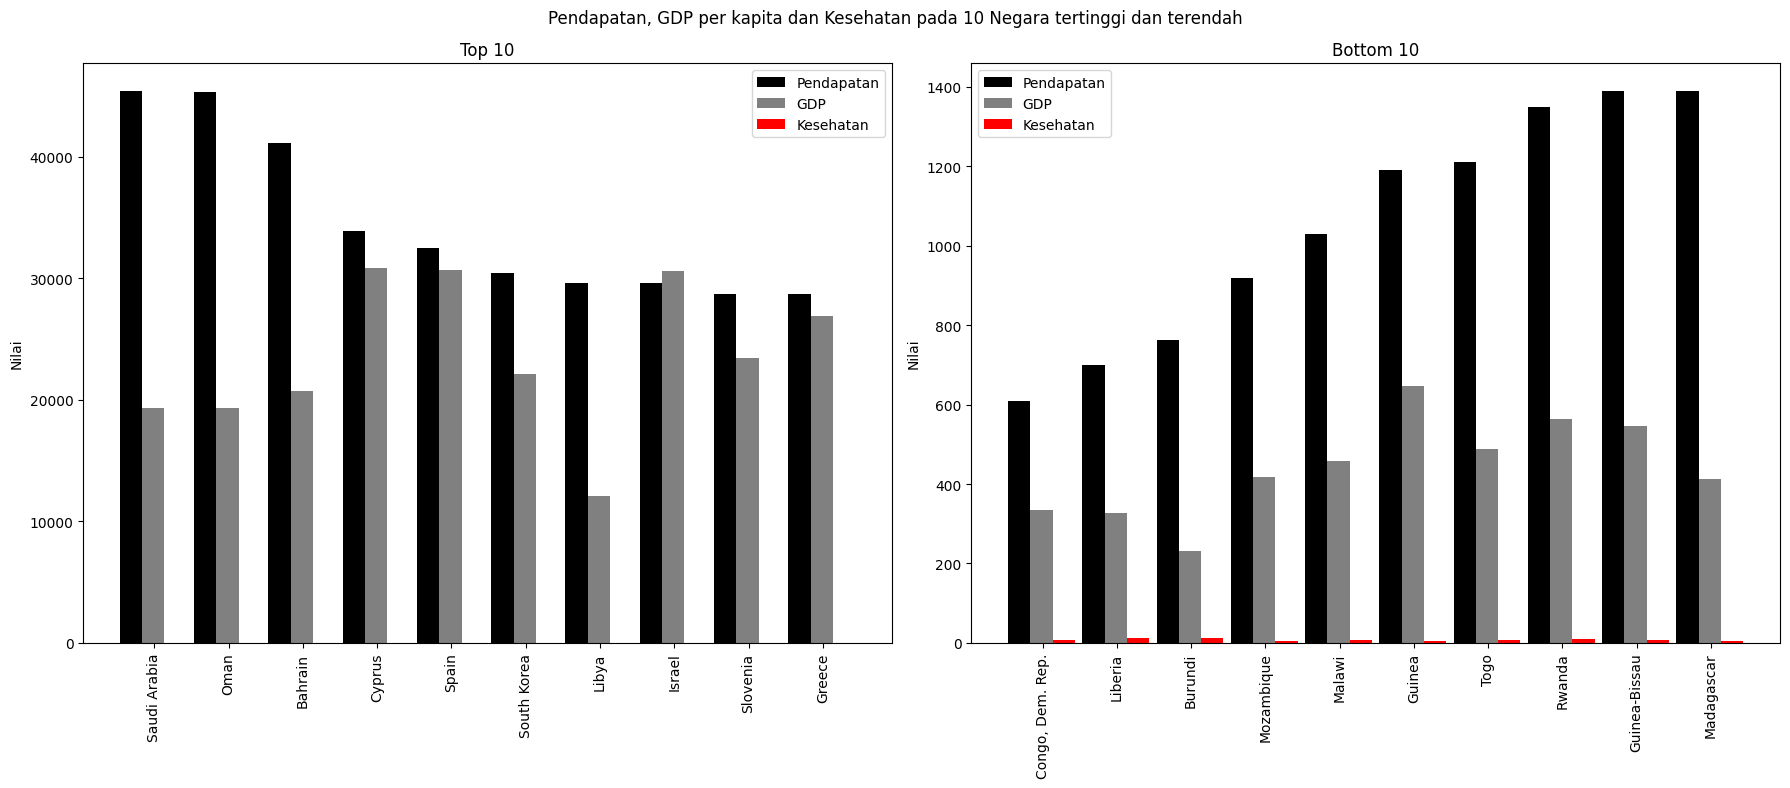

In [27]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
index = np.arange(len(df_top10p.index))
bar_width = 0.30
opacity = 1.0

plt.subplot(1,2,1)
plt.bar(index, df_top10p['Pendapatan'], bar_width, alpha=opacity, color='black', label='Pendapatan')
plt.bar(index + bar_width, df_top10p['GDPperkapita'], bar_width, alpha=opacity, color='grey', label='GDP')
plt.bar(index + bar_width*2, df_top10p['Kesehatan'], bar_width, alpha=opacity, color='red', label='Kesehatan')

plt.ylabel('Nilai')
plt.title('Top 10')
plt.xticks(index + 0.315, df_top10p['Negara'], rotation=90)
plt.legend()

plt.subplot(1,2,2)
plt.bar(index, df_bot10p['Pendapatan'], bar_width, alpha=opacity, color='black', label='Pendapatan')
plt.bar(index + bar_width, df_bot10p['GDPperkapita'], bar_width, alpha=opacity, color='grey', label='GDP')
plt.bar(index + bar_width*2, df_bot10p['Kesehatan'], bar_width, alpha=opacity, color='red', label='Kesehatan')

plt.ylabel('Nilai')
plt.title('Bottom 10')
plt.xticks(index + 0.315, df_bot10p['Negara'], rotation=90)
plt.legend()

fig.suptitle("Pendapatan, GDP per kapita dan Kesehatan pada 10 Negara tertinggi dan terendah")

plt.tight_layout()
plt.show()

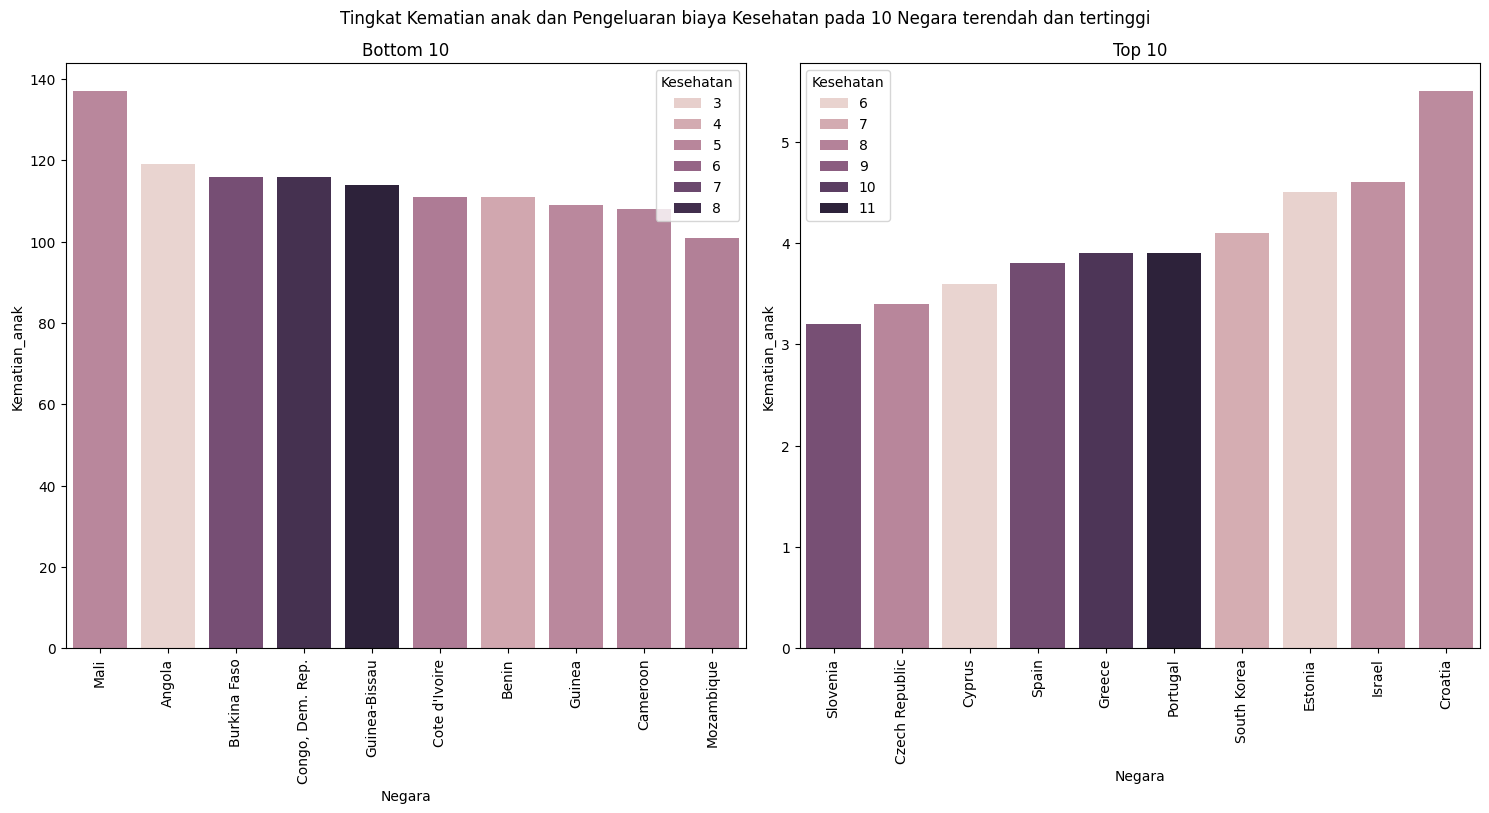

In [28]:
fig, ax = plt.subplots(1,2, figsize=(15,8.25))

plt.subplot(1,2,1)
sns.barplot(x='Negara', y='Kematian_anak', hue='Kesehatan', data=df_top10_ka)
plt.title("Bottom 10")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Negara', y='Kematian_anak', hue='Kesehatan', data=df_bot10_ka)
plt.title("Top 10")
plt.xticks(rotation=90)

fig.suptitle("Tingkat Kematian anak dan Pengeluaran biaya Kesehatan pada 10 Negara terendah dan tertinggi")

plt.tight_layout()
plt.show()

#### 10 Negara dengan tingkat Kematian_anak tertinggi dan perbandingan pengeluaran biaya Kesehatan

Berdasarkan grafik di atas **Mali** merupakan negara dengan tingkat kematian anak tertinggi sebesar **137** anak dan pengeluaran Kesehatan sebesar **4.98** yang merupakan peringkat 3 terbawah bersama dengan Cote d'Ivoire, Guinea, Cameroon dan Mozambique diantara 10 Negara lainnya. Disisi lain, **Slovenia** adalah negara dengan tingkat kematian anak terendah yaitu sebesar **3.2** anak dengan pengeluaran Kesehatan sebesar **9.41**. Nilai tersebut bukanlah yang terbesar namun juga bukan yang terkecil diantara 10 negara lainnya.

Grafik di atas menunjukkan pengeluaran Kesehatan yang rendah tidak selalu berbanding lurus dengan tingkat kematian anak yang tinggi dan begitu pula sebaliknya.

Untuk lebih memperjelas **Guinea-Bissau** adalah negara dengan pengeluaran Kesehatan terbesar diantara 10 negara dengan tingkat kematian anak tertinggi. Pengeluaran biaya Kesehatan sebesar **8.50** namun memiliki tingkat kematian anak sebesar **114.0**. Sedangkan disisi lain negara seperti **Czech Republic, Cyprus, South Korea, Estonia, Israel dan Croatia** memiliki pengeluaran kesehatan lebih rendah berkisar diantara **6-7** akan tetapi memiliki tingkat kematian anak sangat jauh dibawahnya yaitu berkisar diantara **3-5** anak berbanding dengan **114** anak

Dapat ditarik kesimpulan bahwa pengeluaran Kesehatan tetap memiliki pengaruh terhadap tingkat kematian anak meskipun tentu saja hal tersebut bukanlah satu-satunya faktor/faktor utama dari tinggi nya tingkat kematian.

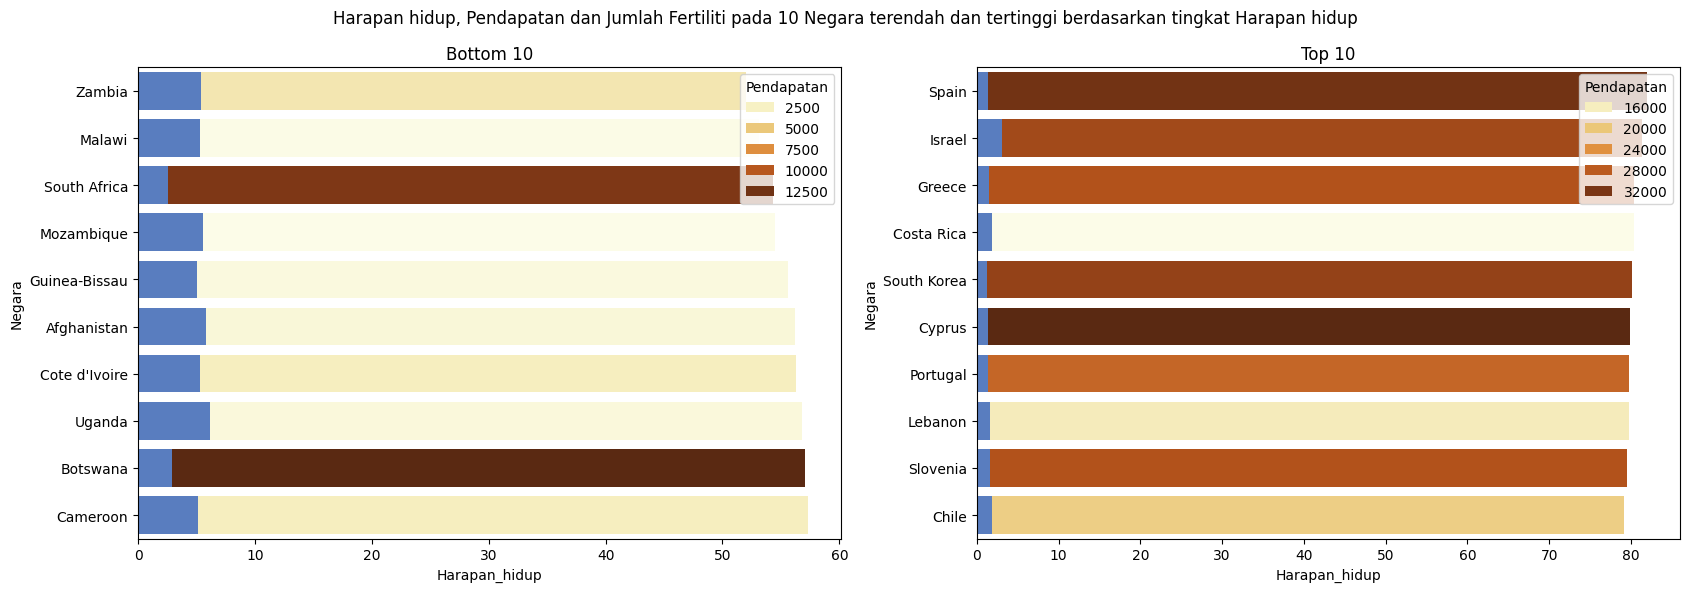

In [29]:
fig, ax = plt.subplots(1,2, figsize=(17,6))

plt.subplot(1,2,1)
sns.set_color_codes("pastel")
sns.barplot(x='Harapan_hidup', y='Negara', hue='Pendapatan', orient='h', palette='YlOrBr', data=df_bot10_hh)
sns.set_color_codes("muted")
sns.barplot(x='Jumlah_fertiliti', y='Negara', orient='h', color='b', legend=False, data=df_bot10_hh)
plt.title("Bottom 10")


plt.subplot(1,2,2)
sns.set_color_codes("pastel")
sns.barplot(x='Harapan_hidup', y='Negara', hue='Pendapatan', orient='h', palette='YlOrBr', data=df_top10_hh)
sns.set_color_codes("muted")
sns.barplot(x='Jumlah_fertiliti', y='Negara', orient='h', color='b', legend=False, data=df_top10_hh)
plt.title("Top 10")

fig.suptitle("Harapan hidup, Pendapatan dan Jumlah Fertiliti pada 10 Negara terendah dan tertinggi berdasarkan tingkat Harapan hidup")

plt.tight_layout()
plt.show()

#### 10 Negara dengan tingkat Harapan_hidup terendah dan tertinggi berbanding dengan jumlah fertiliti dan Pendapatan-nya

Berdasarkan grafik di atas **Zambia** merupakan negara dengan Harapan hidup terendah yaitu sebesar **52** tahun dengan jumlah fertiliti sebesar **5.40**. Sedangkan **Spain** merupakan negara dengan Harapan hidup tertinggi sebesar **81.9** dengan jumlah fertiliti sebesar **1.37**.

Selain itu, dapat kita lihat grafik di atas menunjukkan tren dimana Negara-negara dengan tingkat **Harapan hidup dan Pendapatan yang tinggi** cenderung memiliki **jumlah fertiliti rendah** yang berikisar diantara **1.23 - 3.03**. Sedangkan Negara-negara dengan tingkat **Harapan hidup dan Pendapatan yang rendah** memiliki **jumlah fertiliti tinggi** yang berkisar diantara **2.59 - 6.15**.

Hal ini juga dapat kembali dilihat lebih jelas pada kelompok Negara dengan Harapan hidup dan Pendapatan yang rendah. **South Africa** yang memiliki Pendapatan sebesar **12000** memiliki Jumlah fertiliti **2.59** dan **Bostwana** yang memiliki Pendapatan sebesar **13300** memiliki Jumlah fertiliti **2.88**. Sedangkan 8 Negara lainnya yang memiliki Pendapatan berkisar diantara **918-3280** memiliki Jumlah fertiliti diantara **5.11-6.15**.

Dapat ditarik kesimpulan bahwa Negara dengan Pendapatan lebih tinggi memiliki dampak ke Harapan hidup yang lebih tinggi juga. Namun, tidak berbanding lurus dengan Jumlah fertiliti yang dimiliki negara tersebut, begitu pula sebaliknya.

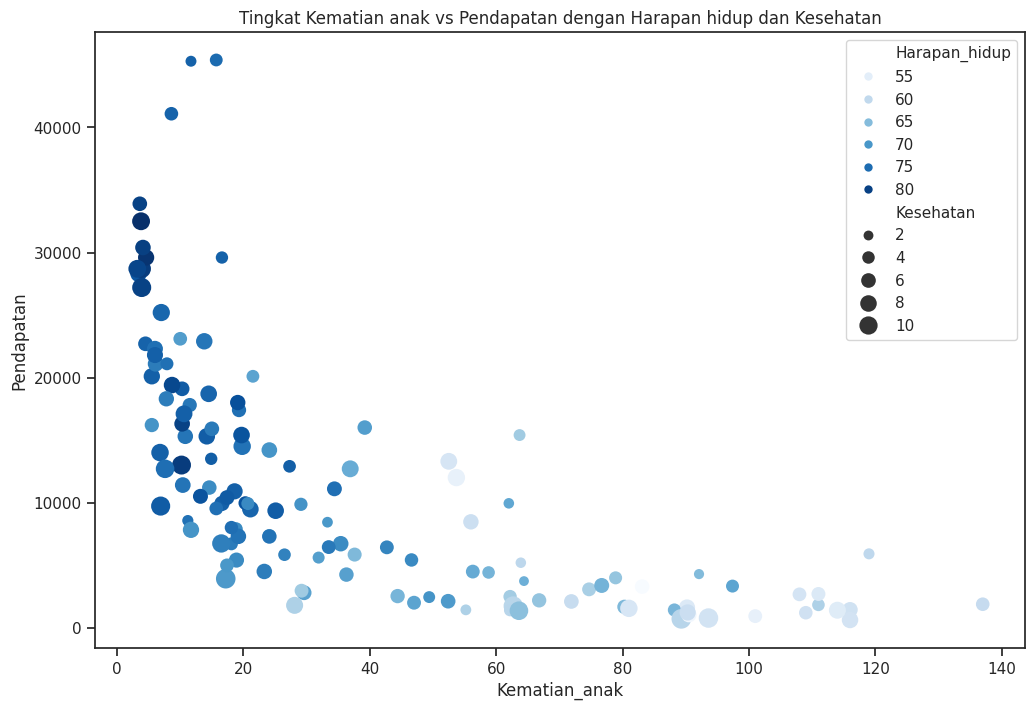

In [30]:
sns.set_theme(style='ticks', rc={'figure.figsize':(12,8)})

sns.scatterplot(x='Kematian_anak', y='Pendapatan', hue='Harapan_hidup', palette='Blues', size='Kesehatan', sizes=(50,200), edgecolor='none', data=df_clean)
plt.title('Tingkat Kematian anak vs Pendapatan dengan Harapan hidup dan Kesehatan')

plt.show()

In [31]:
df_line = df_clean.sort_values(by='Inflasi', ascending=True)

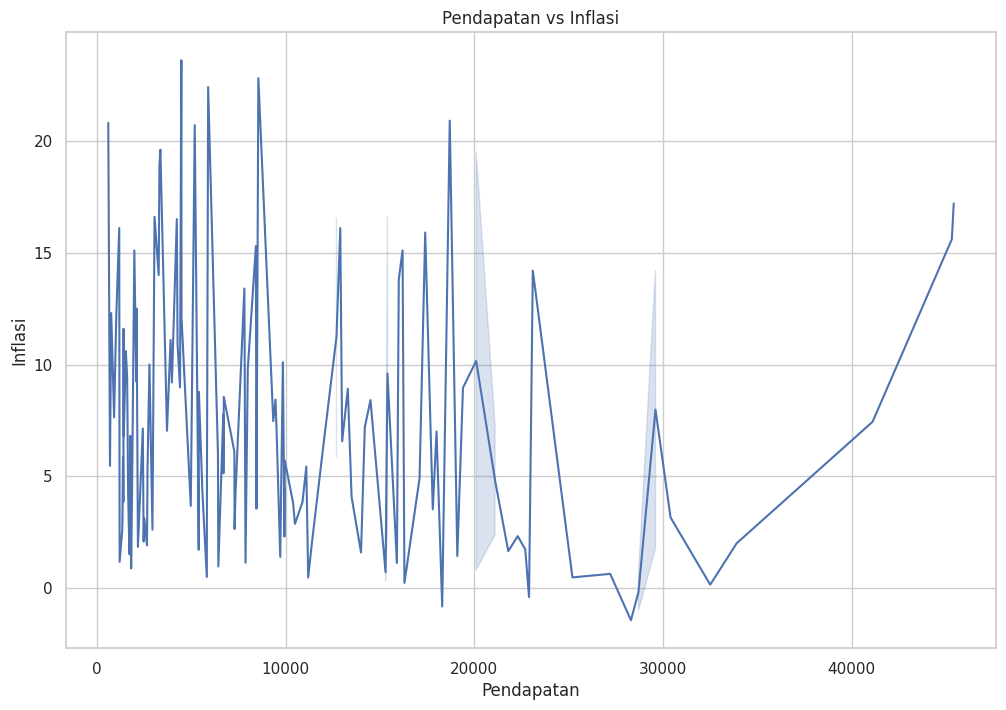

In [32]:
sns.set_style('whitegrid')
sns.lineplot(x='Pendapatan', y='Inflasi', data=df_line)
plt.title('Pendapatan vs Inflasi')
plt.show()

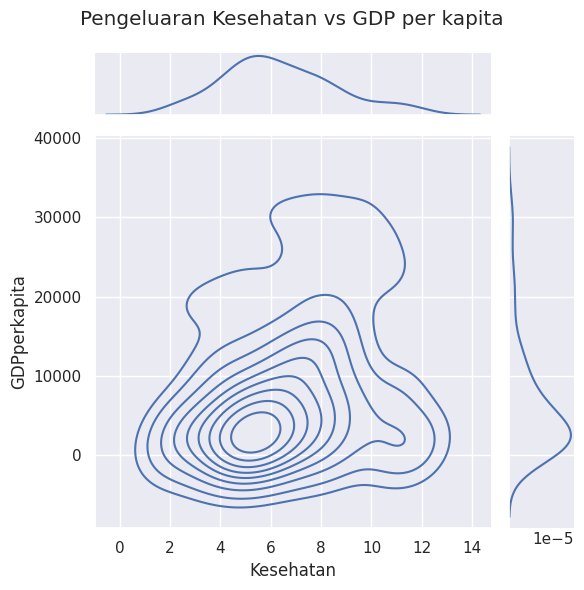

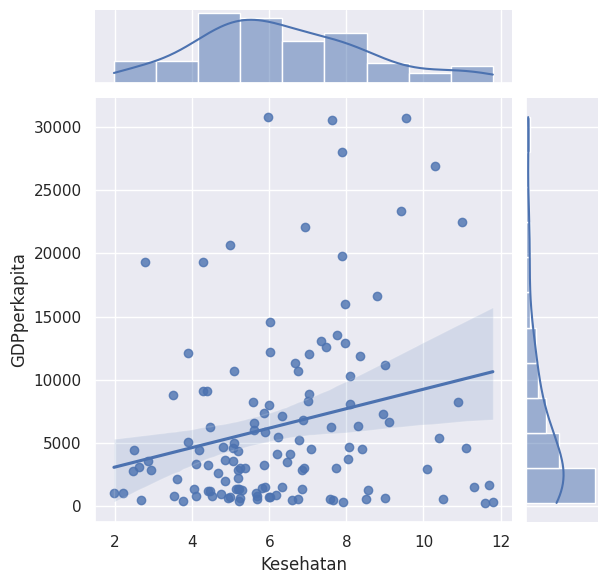

In [33]:
with sns.axes_style('darkgrid'):
  j=sns.jointplot(data=df_clean, x="Kesehatan", y="GDPperkapita", kind='kde')

  sns.jointplot(data=df_clean, x="Kesehatan", y="GDPperkapita", kind='reg')

j.fig.suptitle('Pengeluaran Kesehatan vs GDP per kapita')
j.fig.tight_layout()

plt.show()

In [34]:
df_pair = df_sample1.copy()

In [35]:
df_pair.drop(['Ekspor','Impor','Inflasi'], axis=1, inplace=True)

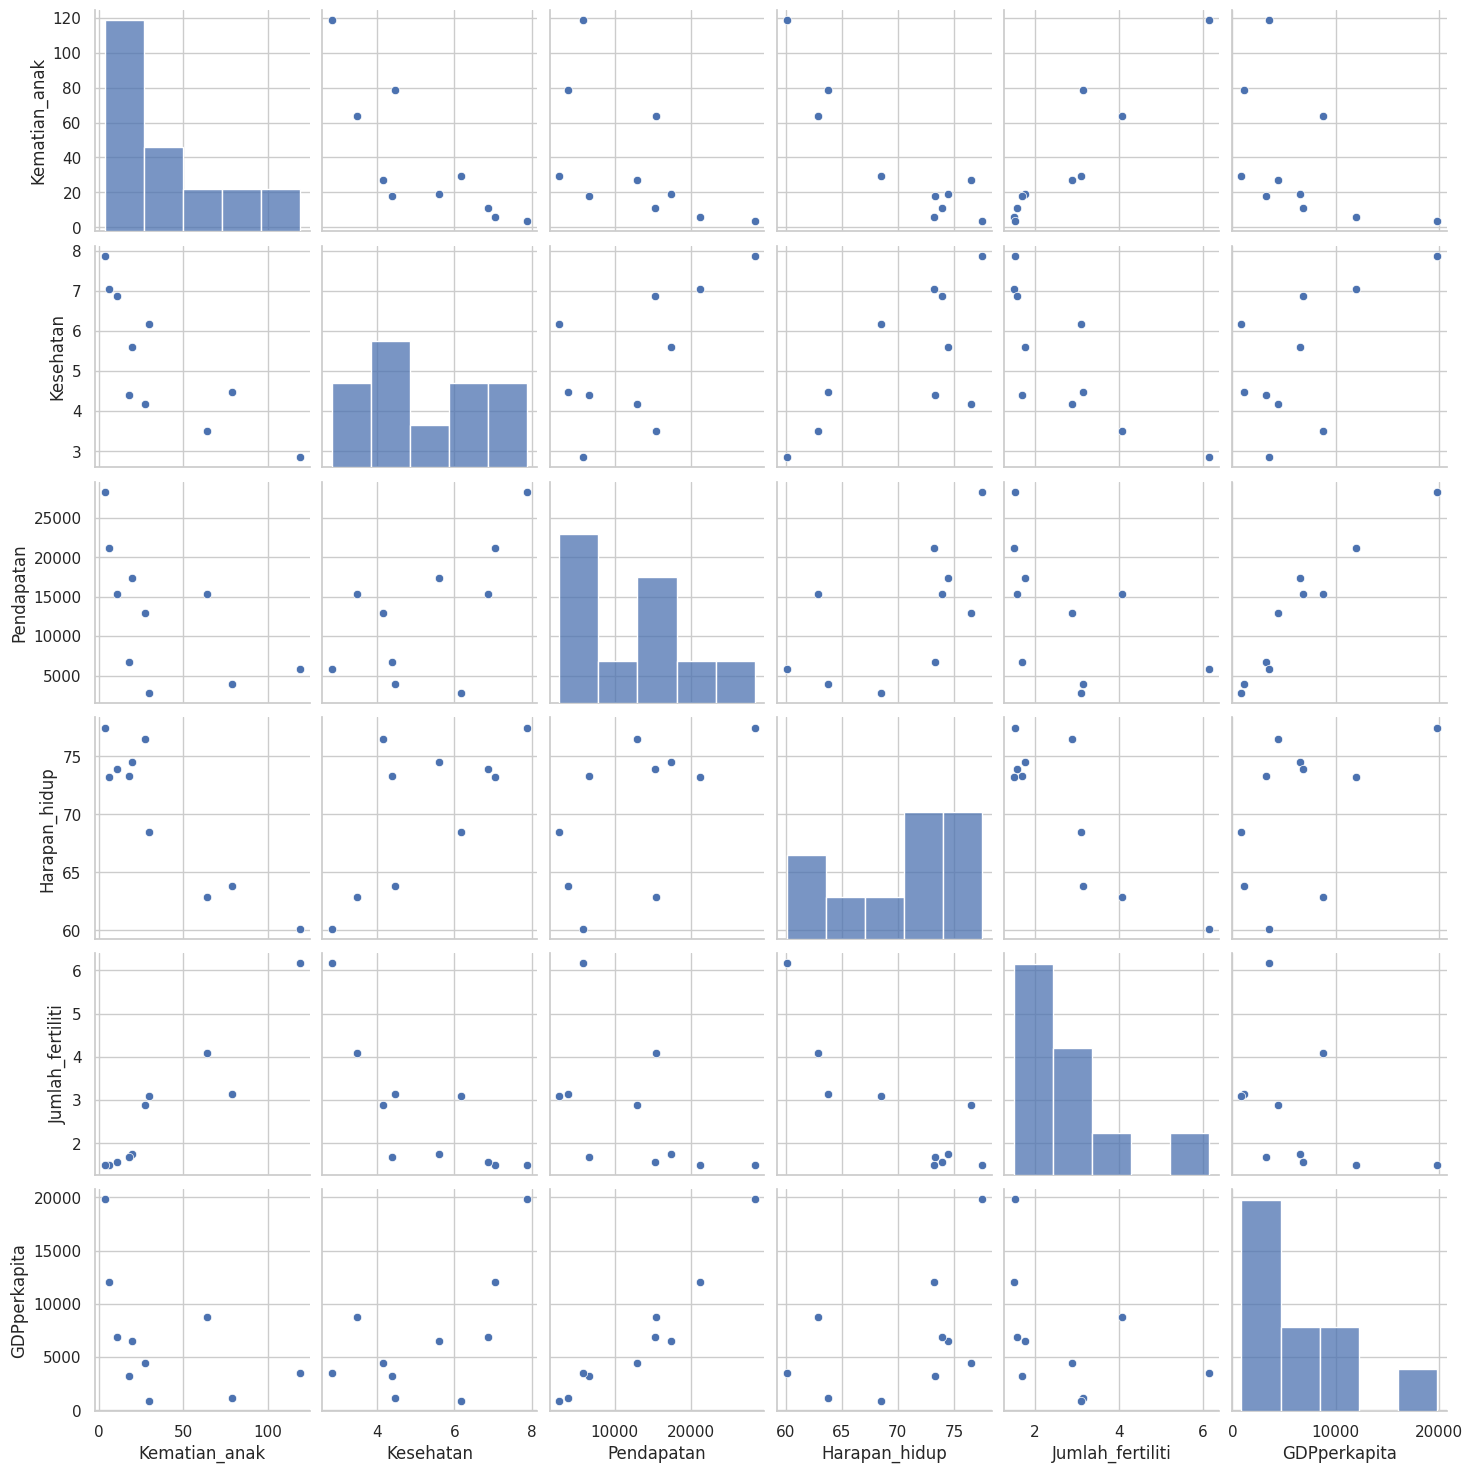

In [36]:
sns.pairplot(df_pair)
plt.show()

<ipython-input-37-fb6391302073>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_clean.corr(), annot = True, cmap='RdYlGn')


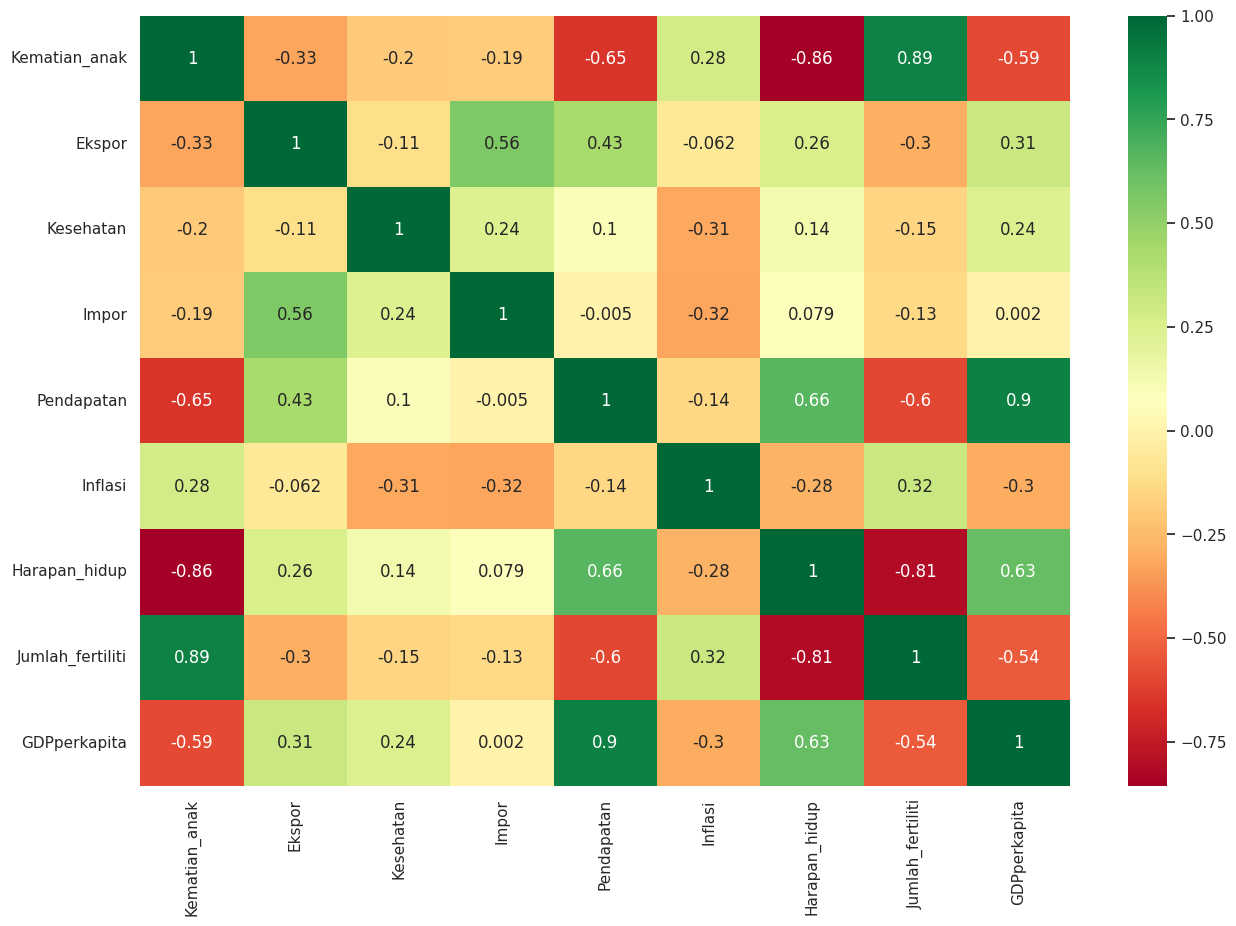

In [37]:
plt.figure(figsize = (15,10))
sns.heatmap(df_clean.corr(), annot = True, cmap='RdYlGn')

plt.show()

#### Clustering dengan K-Means

In [38]:
df_clean

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [39]:
df_cleaned = df_clean.copy()

In [40]:
df_cleaned.drop(['Ekspor','Impor','Inflasi', 'Jumlah_fertiliti', 'Kesehatan'], axis=1, inplace=True)

In [41]:
df_cleaned

,Negara,Kematian_anak,Pendapatan,Harapan_hidup,GDPperkapita
0,Afghanistan,90.2,1610,56.2,553
1,Albania,16.6,9930,76.3,4090
2,Algeria,27.3,12900,76.5,4460
3,Angola,119.0,5900,60.1,3530
4,Antigua and Barbuda,10.3,19100,76.8,12200
...,...,...,...,...,...
161,Uzbekistan,36.3,4240,68.8,1380
162,Vanuatu,29.2,2950,63.0,2970
164,Vietnam,23.3,4490,73.1,1310
165,Yemen,56.3,4480,67.5,1310


In [42]:
df_cleaned.to_excel("drive/MyDrive/Colab Notebooks/Project/Data_Cleaned.xlsx")

In [43]:
for col in ['Kematian_anak', 'Pendapatan', 'Harapan_hidup', 'GDPperkapita']:
    df_cleaned[col] = df_cleaned[col].astype('float')

In [44]:
df_cleaned.drop(['Negara'], axis=1, inplace=True)

In [45]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 166
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kematian_anak  128 non-null    float64
 1   Pendapatan     128 non-null    float64
 2   Harapan_hidup  128 non-null    float64
 3   GDPperkapita   128 non-null    float64
dtypes: float64(4)
memory usage: 5.0 KB


n_cluster = 3


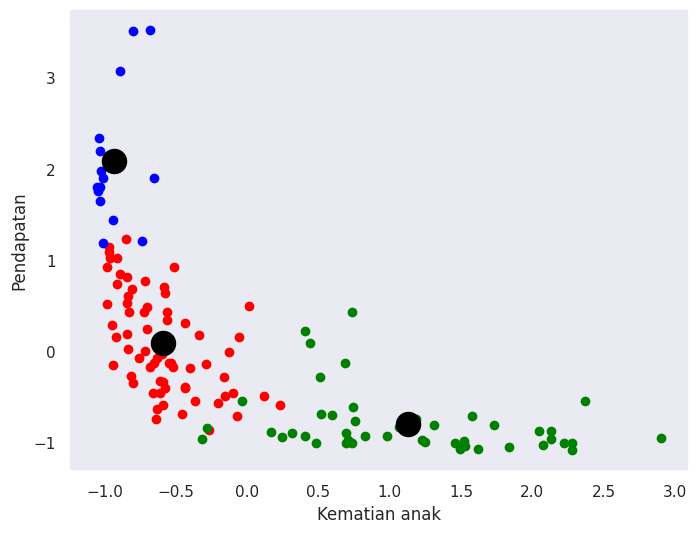

Elbow Method


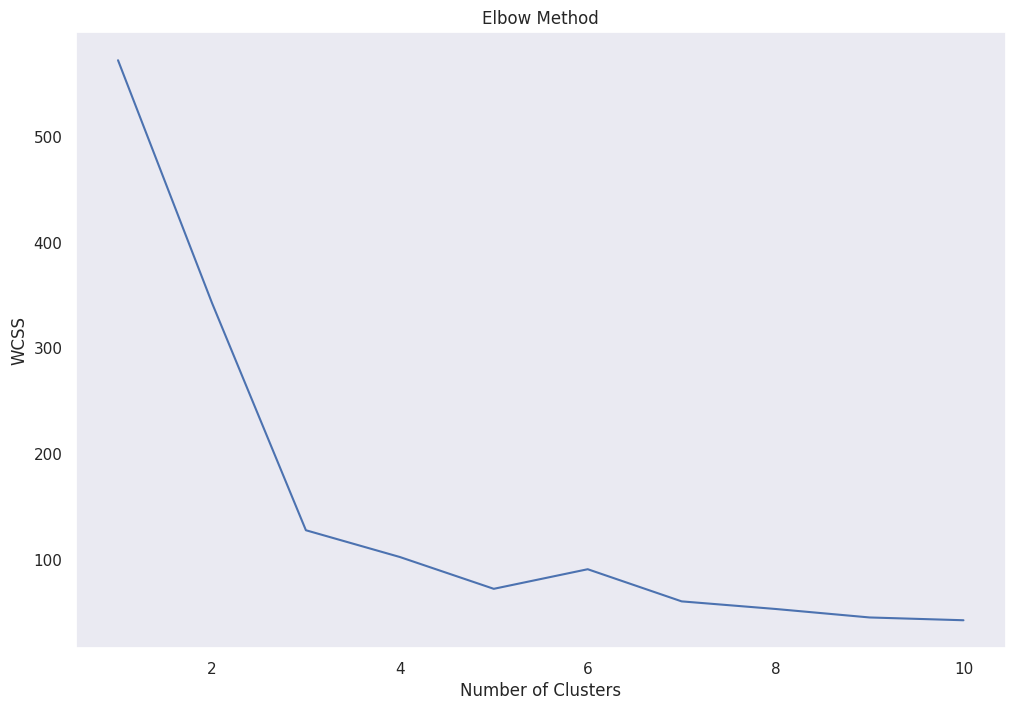

sse :
[572.6796875, 343.03561182728, 127.83606347367873, 102.50385656911251, 72.39863060600084, 90.94162474256784, 60.51239144322681, 53.31353424564348, 45.28867801527912, 42.64693991507598]
n_cluster = 5


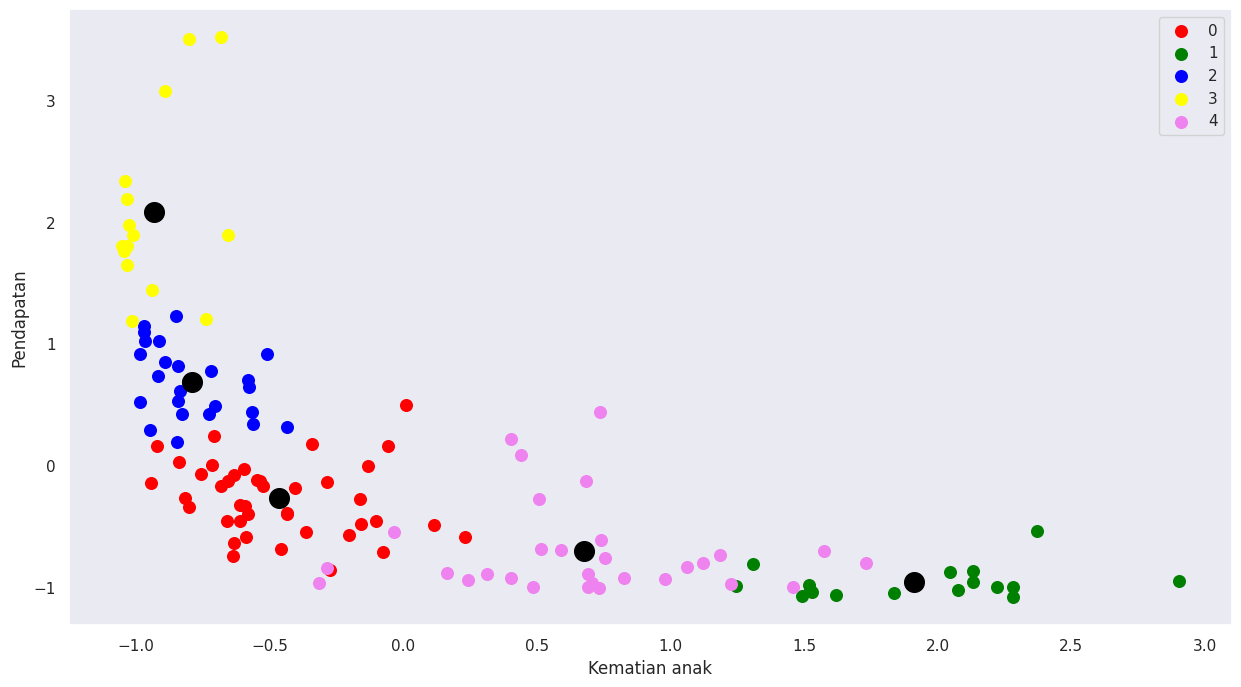

Silhoutte coefficient
k = 3 : 0.5369961314297742
k = 5 : 0.6729650081654357


In [52]:
std = StandardScaler()
df_fit = std.fit_transform(df_cleaned)


kmeans1 = KMeans(n_clusters=3, n_init='auto').fit(df_fit)
labels = kmeans1.labels_
centers1 = kmeans1.cluster_centers_

df_std = pd.DataFrame(data=df_fit, columns=['Kematian_anak', 'Pendapatan',	'Harapan_hidup', 'GDPperkapita'])
df_std['cluster_3'] = labels

print("n_cluster = 3")
fig, axes = plt.subplots(figsize=(8,6))

plt.scatter(df_std.Kematian_anak[df_std.cluster_3==0], df_std['Pendapatan'][df_std.cluster_3==0], c='red')
plt.scatter(df_std.Kematian_anak[df_std.cluster_3==1], df_std['Pendapatan'][df_std.cluster_3==1], c='green')
plt.scatter(df_std.Kematian_anak[df_std.cluster_3==2], df_std['Pendapatan'][df_std.cluster_3==2], c='blue')

plt.scatter(centers1[:, 0], centers1[:, 1], c='black', s=300)
plt.xlabel('Kematian anak')
plt.ylabel('Pendapatan')
plt.show()

#=============================================================================================================================

sse = []
for k in range(1, 11):
    kmeans_elbow = KMeans(n_clusters=k, n_init='auto').fit(df_std)
    sse.append(kmeans_elbow.inertia_)
print("Elbow Method")
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
print("sse :")
print(sse)

#=============================================================================================================================

kmeans2 = KMeans(n_clusters=5, n_init='auto').fit(df_std)
labels2 = kmeans2.labels_
centers2 = kmeans2.cluster_centers_

df_std['cluster_5'] = labels2

print("n_cluster = 5")
fig, axes = plt.subplots(figsize=(15,8))

plt.scatter(df_std.Kematian_anak[df_std.cluster_5==0], df_std['Pendapatan'][df_std.cluster_5==0], c='red', s=70, label='0')
plt.scatter(df_std.Kematian_anak[df_std.cluster_5==1], df_std['Pendapatan'][df_std.cluster_5==1], c='green', s=70, label='1')
plt.scatter(df_std.Kematian_anak[df_std.cluster_5==2], df_std['Pendapatan'][df_std.cluster_5==2], c='blue', s=70, label='2')
plt.scatter(df_std.Kematian_anak[df_std.cluster_5==3], df_std['Pendapatan'][df_std.cluster_5==3], c='yellow', s=70, label='3')
plt.scatter(df_std.Kematian_anak[df_std.cluster_5==4], df_std['Pendapatan'][df_std.cluster_5==4], c='violet', s=70, label='4')

plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=200)
plt.xlabel('Kematian anak')
plt.ylabel('Pendapatan')
plt.legend()
plt.show()

#=============================================================================================================================

print("Silhoutte coefficient")
silhouette_coefficient = silhouette_score(df_std, kmeans1.labels_)
print("k = 3 :",silhouette_coefficient)
silhouette_coefficient3 = silhouette_score(df_std, kmeans2.labels_)
print("k = 5 :",silhouette_coefficient3)

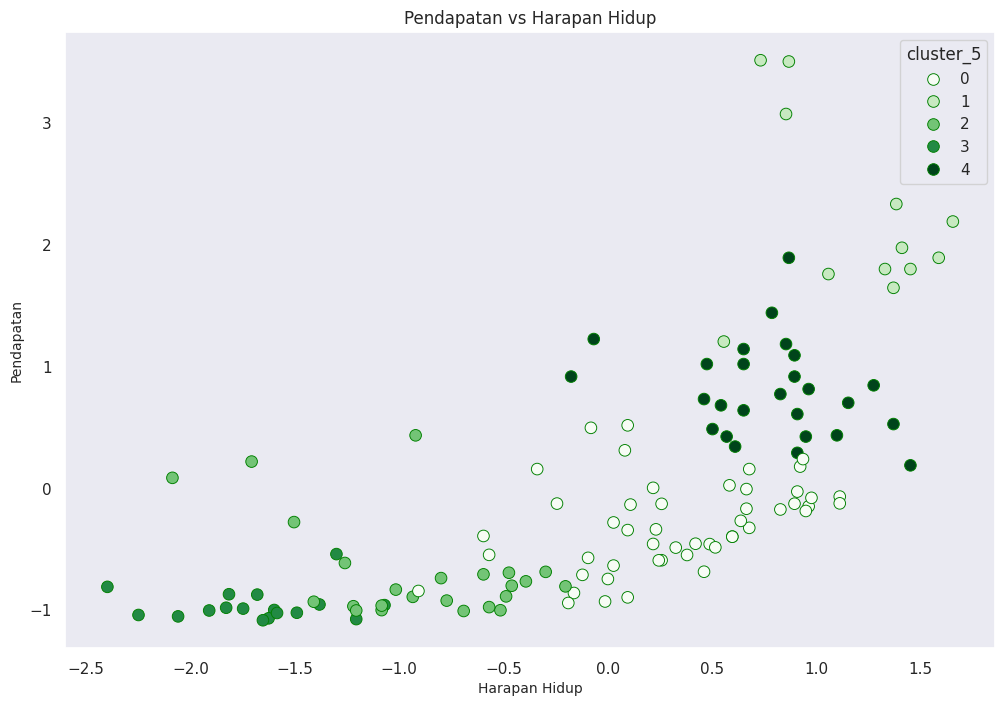

In [47]:
fig = plt.figure(figsize = (12,8))
sns.set_style('dark')
sns.scatterplot(x='Harapan_hidup', y='Pendapatan', hue='cluster_5', s=70, palette='Greens', edgecolor='green', legend='full', data=df_std)
plt.xlabel('Harapan Hidup', fontsize=10)
plt.ylabel('Pendapatan', fontsize=10)
plt.title('Pendapatan vs Harapan Hidup')
plt.show()

In [48]:
df_std.to_excel("drive/MyDrive/Colab Notebooks/Project/Data_KMeans.xlsx")

In [53]:
df_new = pd.DataFrame(data = df_std, columns = ['Pendapatan', 'Harapan_hidup', 'cluster_5'])
df_new['Pendapatan (ril)'] = df_clean['Pendapatan']
df_new['H.Hidup (ril)'] = df_clean['Harapan_hidup']
df_new['Negara'] = df_clean['Negara']

prendah = df_new['cluster_5'] == 4
hrendah = df_new['cluster_5'] == 4
phrendah = df_new[(prendah) & (hrendah)]

pIF = phrendah['Pendapatan (ril)'] < phrendah['Pendapatan (ril)'].mean()
hIF = phrendah['H.Hidup (ril)'] < phrendah['H.Hidup (ril)'].mean()
df_phrendah = phrendah[(pIF) & (hIF)]

df_ril = df_phrendah.sort_values(by = ['Pendapatan (ril)'], ascending = True).head(5)
df_ril

,Pendapatan,Harapan_hidup,cluster_5,Pendapatan (ril),H.Hidup (ril),Negara
88,-0.705573,-0.595497,4,700.0,60.8,Liberia
63,-0.890443,-0.934269,4,1190.0,58.0,Guinea
126,-0.685031,-0.297378,4,1350.0,64.6,Rwanda
64,-0.967472,-1.218837,4,1390.0,55.6,Guinea-Bissau
97,-1.006500,-0.690353,4,1870.0,59.5,Mali
